standardization prac

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [34]:
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
values = [10, 11, 12, 15, 13, 18, 14, 17, 19, 7] * 10

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

x = data['Value'].values.reshape(-1, 1)

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)


####################

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.DataFrame({
    'Values' : [10, 20, 30, 40, 50]
})


In [24]:
data['LogVal'] = np.log(data['Values'])

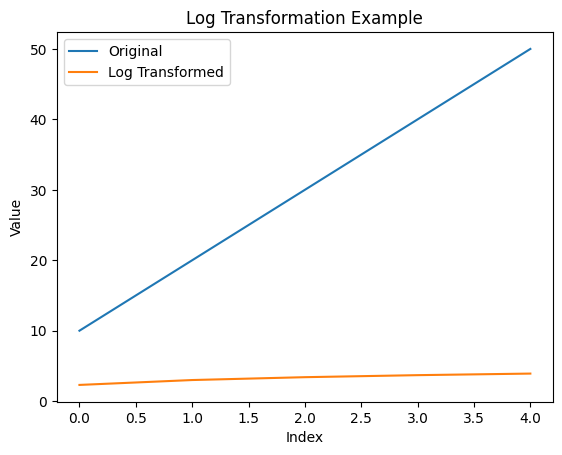

In [25]:
# 데이터 시각화 
plt.plot(data['Values'], label='Original')
plt.plot(data['LogVal'], label='Log Transformed')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Log Transformation Example')
plt.legend()
plt.show()

In [26]:
data = pd.DataFrame({
    'Value' : [10, 20, 40, 80, 150]
})

data['DiffValue'] = data['Value'].diff()

print(data)

   Value  DiffValue
0     10        NaN
1     20       10.0
2     40       20.0
3     80       40.0
4    150       70.0


In [27]:
from scipy.stats import boxcox
data = pd.DataFrame({
    'Value':[10, 20, 30, 40, 50]
})

transformed_data, lambda_ = boxcox(data['Value'])

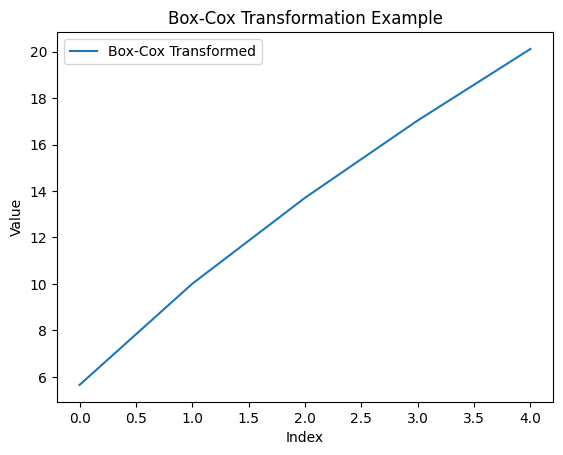

In [28]:
# 변환된 데이터 시각화
plt.plot(transformed_data, label='Box-Cox Transformed')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Box-Cox Transformation Example')
plt.legend()
plt.show()

How to choose appropriate normalization and transform method for data

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

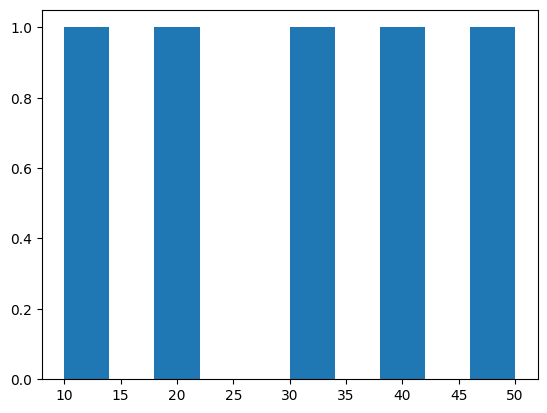

In [29]:
data = pd.DataFrame({
    'Value' : [10, 20, 30, 40, 50]
})

plt.hist(data['Value'])

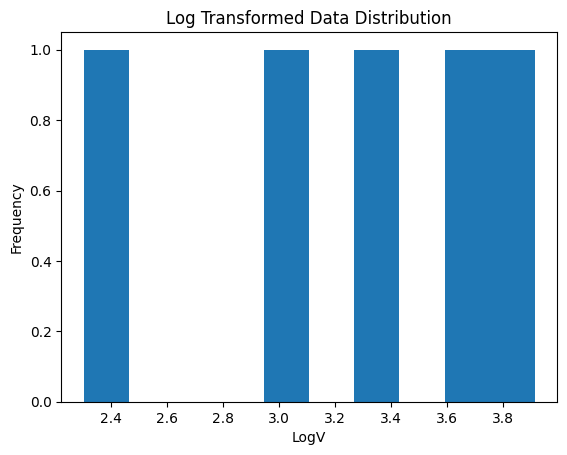

In [30]:
data['LogV'] = np.log(data['Value'])

plt.hist(data['LogV'])
plt.xlabel('LogV')
plt.ylabel('Frequency')
plt.title('Log Transformed Data Distribution')
plt.show()

#13

In [31]:
n = 100 # the # of data pointer
ar_params = [0.7] #auto regressive
ma_params = [] #moving average
residuals = np.random.normal(0, 1, n)

#AR(1) model creation
data = [0]
for i in range(1, n):
    data.append(ar_params[0]*data[i -1]+residuals[i])

#DataFrame creation
df = pd.DataFrame({
    'Date':pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Value':data
})
print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02  0.089247
2  2023-01-03 -0.563786
3  2023-01-04 -0.706244
4  2023-01-05 -0.931401
..        ...       ...
95 2023-04-06 -0.190492
96 2023-04-07 -0.816037
97 2023-04-08 -3.034465
98 2023-04-09  0.075881
99 2023-04-10 -0.579056

[100 rows x 2 columns]


In [32]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf


                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -143.252
Method:               Conditional MLE   S.D. of innovations              1.028
Date:                Wed, 31 May 2023   AIC                            292.503
Time:                        17:17:42   BIC                            300.289
Sample:                             1   HQIC                           295.653
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0736      0.105      0.704      0.482      -0.131       0.279
Value.L1       0.5933      0.081      7.313      0.000       0.434       0.752
                                    Roots           

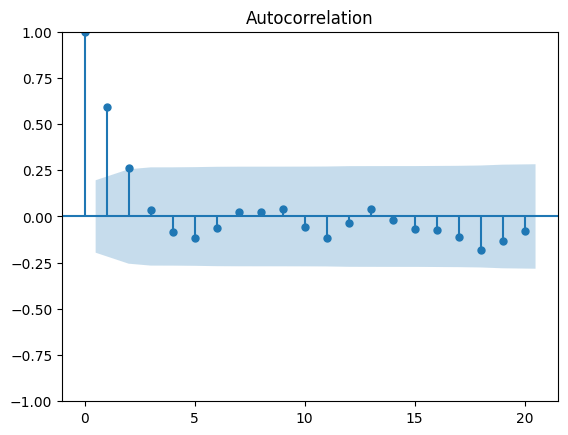

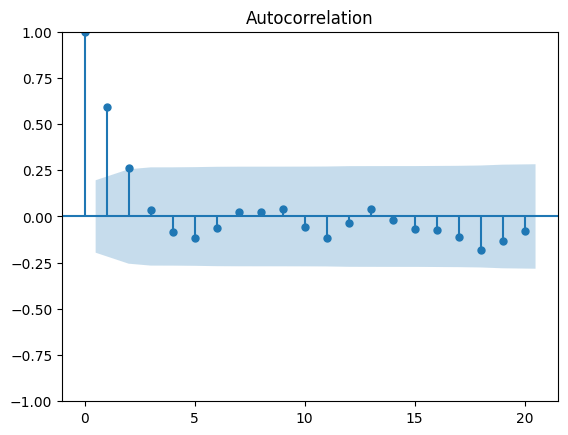

In [37]:
model = AutoReg(df['Value'], lags=1)
results = model.fit()


print(results.summary())

plot_acf(df['Value'], lags=20)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
n = 100 # the # of data pointer
ma_params = [0.4, -0.2] #moving average
residuals = np.random.normal(0, 1, n)

#MA(2) model creation
data = [0, 0]
for i in range(2, n):
    data.append(ma_params[0]*residuals[i-1] + ma_params[1] + residuals[i-2]+residuals[i])

#DataFrame creation
df = pd.DataFrame({
    'Value':data
})

In [42]:
model = ARIMA(df['Value'], order=(0, 0, 2))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -141.570
Date:                Wed, 31 May 2023   AIC                            291.139
Time:                        17:41:44   BIC                            301.560
Sample:                             0   HQIC                           295.357
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3652      0.229     -1.595      0.111      -0.814       0.084
ma.L1          0.3351      4.048      0.083      0.934      -7.600       8.270
ma.L2          0.9999     24.170      0.041      0.9